In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\manan\Downloads\tested.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
df.dropna()
df.fillna(value="nan")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,nan,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,nan,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,nan,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,nan,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,nan,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,nan,0,0,A.5. 3236,8.05,nan,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,nan,S
416,1308,0,3,"Ware, Mr. Frederick",male,nan,0,0,359309,8.05,nan,S


In [5]:
df= df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df = df.dropna()

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

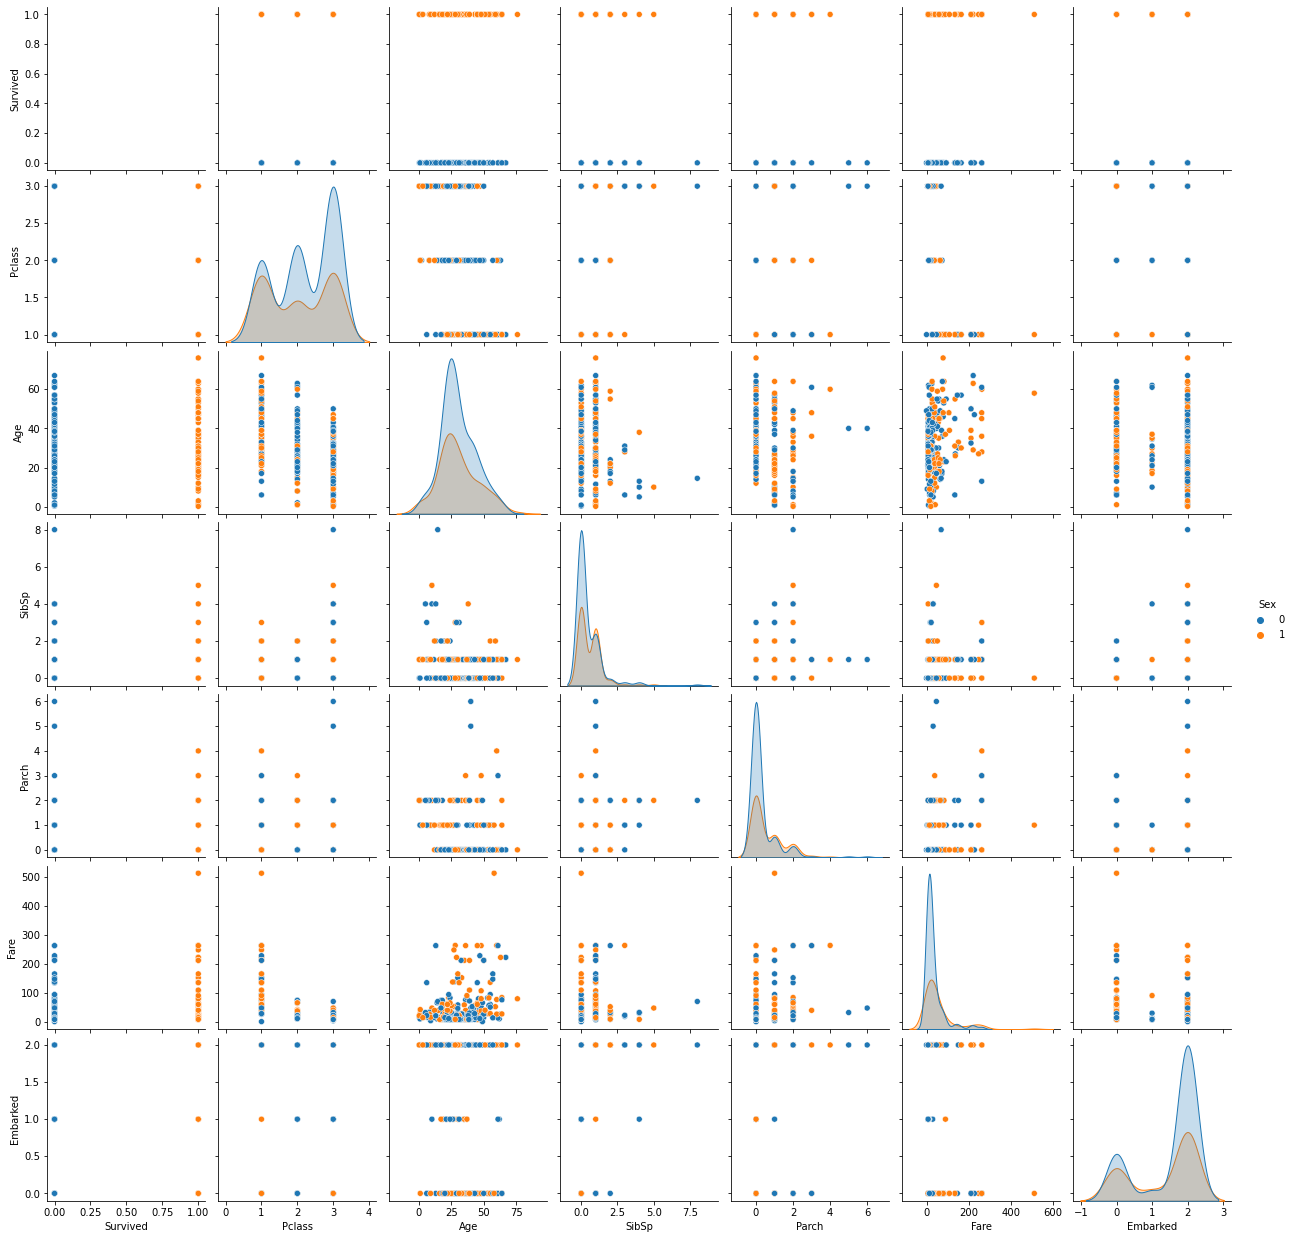

In [14]:
sns.pairplot(df,hue="Sex")

Text(0.5, 1.0, 'Sex')

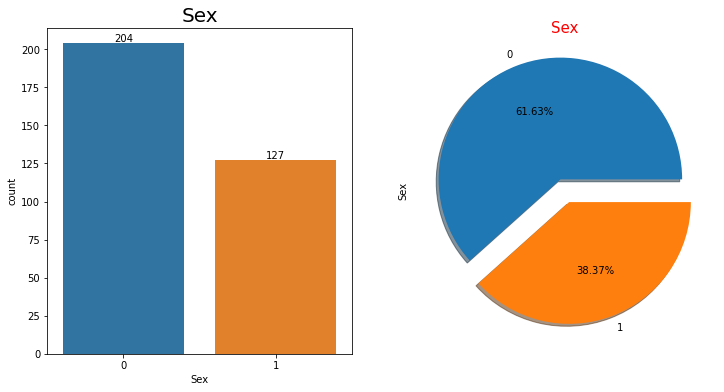

In [11]:
plt.figure(figsize=(12,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex', data=df)
ax.bar_label(ax.containers[0])
plt.title("Sex", fontsize=20)
ax =plt.subplot(1,2,2)
ax=df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 15,color='Red')

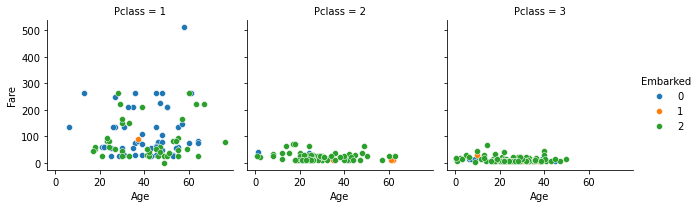

In [13]:
m = sns.FacetGrid(df, col="Pclass", hue="Embarked")
m.map_dataframe(sns.scatterplot, x="Age", y="Fare")
m.add_legend()
plt.show()

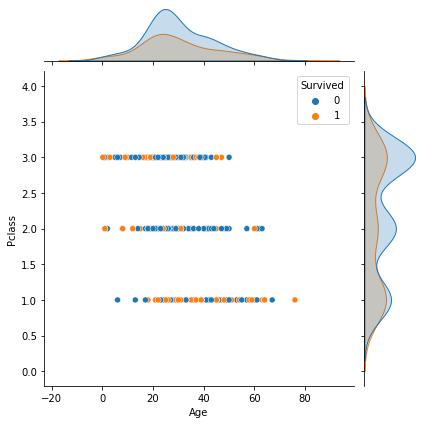

In [16]:
sns.jointplot(x="Age",y="Pclass",data=df,color="red",hue="Survived")
plt.show()

In [17]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)

# Naive Bayes(Gaussian)

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Gnb = GaussianNB()
Gnb.fit(X_train,y_train)
y_pred_Gnb = Gnb.predict(X_test)

print("Training set score: {:.2f}".format(Gnb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Gnb.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_Gnb)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_Gnb))
print("Classification_Report: \n",classification_report(y_test,y_pred_Gnb))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[53  0]
 [ 0 47]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        47

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

